#### Library

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 100)

#### Load Data

In [53]:
df = pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13...,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹399,"₹1,099",64%,4.2,"24,269","High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERN...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE...","Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good ...","Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now s...",https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/51UsScvHQNL._SX300_SY300_QL70_FMwebp...,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Charging/dp/B07JW9H4J1/ref=sr_1_1?qid=167290...
1,B098NS6PVG,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, L...",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be it an android smartphone (Mi, Samsung, Oppo, Vivo...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRP...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,BharanI,sonia,Niam","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RYGGS0M09S3KY,R17KQRUTAN5DKS,R3AAQGS6HP2QUK,R1HDNOG6...","A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Goo...",I ordered this cable to connect my phone to Android Auto of car. The cable is really strong and ...,https://m.media-amazon.com/images/W/WEBP_402378-T2/images/I/31zOsqQOAOL._SY445_SX342_QL70_FMwebp...,https://www.amazon.in/Ambrane-Unbreakable-Charging-Braided-Cable/dp/B098NS6PVG/ref=sr_1_2?qid=16...
2,B096MSW6CT,"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7,...",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safety proctections and four-core copper wires promote ...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3OA,AHTPQRIMGUD4BYR5YIHBH3CCGEFQ,AEUVWXYP5...","Kunal,Himanshu,viswanath,sai niharka,saqib malik,Aashiq,Ramu Challa,Sanjay gupta","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R25X4TBMPY91LX,R27OK7G99VK0TR,R207CYDCHJJTCJ,R3PCU8X...","Good speed for earlier versions,Good Product,Working good,Good for the price,Good,Worth for mone...","Not quite durable and sturdy,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/71rIggr...",https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/31IvNJZnmdL._SY445_SX342_QL70_FMwebp...,https://www.amazon.in/Sounce-iPhone-Charging-Compatible-Devices/dp/B096MSW6CT/ref=sr_1_3?qid=167...
3,B08HDJ86NZ,"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A...",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹329,₹699,53%,4.2,"94,363","The boAt Deuce USB 300 2 in 1 cable is compatible with smartphones, tablets, PC peripherals, Blu...","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5SGCUQBP7YSCA,AH725ST5NW2Y4JZPKUNTIJCUK2BA,AHV3TXIFC...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh chouhan,Ravi Siddan,Himanshu Goel,Udaykumar","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1CLH2ULIVG5U3,R2DMKIBGFKBD6R,RC89B5IAJUTR5,R3B3DDON...","Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine product but coul...","Good product,long wire,Charges 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

#### Pre-Processing

In [55]:
df = df[['user_id', 'product_id', 'rating', 'category', 'product_name', 'about_product']]
df.head()

,user_id,product_id,rating,category,product_name,about_product
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERN...",B07JW9H4J1,4.2,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13...,"High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,..."
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRP...",B098NS6PVG,4.0,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, L...","Compatible with all Type C enabled devices, be it an android smartphone (Mi, Samsung, Oppo, Vivo..."
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3OA,AHTPQRIMGUD4BYR5YIHBH3CCGEFQ,AEUVWXYP5...",B096MSW6CT,3.9,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7,...",【 Fast Charger& Data Sync】-With built-in safety proctections and four-core copper wires promote ...
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5SGCUQBP7YSCA,AH725ST5NW2Y4JZPKUNTIJCUK2BA,AHV3TXIFC...",B08HDJ86NZ,4.2,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A...","The boAt Deuce USB 300 2 in 1 cable is compatible with smartphones, tablets, PC peripherals, Blu..."
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZHM4QB2KPKFUQ,AFK4NJOLFSJGWLOJIUIAROJF6YVA,AFUOTYRFU...",B08CF3B7N1,4.2,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhon...,[CHARGE & SYNC FUNCTION]- This cable comes with charging & Data sync function|[HIGH QUALITY MATE...


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        1465 non-null   object
 1   product_id     1465 non-null   object
 2   rating         1465 non-null   object
 3   category       1465 non-null   object
 4   product_name   1465 non-null   object
 5   about_product  1465 non-null   object
dtypes: object(6)
memory usage: 68.8+ KB


In [57]:
df.duplicated().sum()

100

In [58]:
df_clean = df.drop_duplicates(subset=['user_id', 'product_id'])
df_clean.duplicated().sum()

0

In [59]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1361 entries, 0 to 1464
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        1361 non-null   object
 1   product_id     1361 non-null   object
 2   rating         1361 non-null   object
 3   category       1361 non-null   object
 4   product_name   1361 non-null   object
 5   about_product  1361 non-null   object
dtypes: object(6)
memory usage: 74.4+ KB


In [60]:
user_encoder = LabelEncoder()
product_encoder = LabelEncoder()

In [61]:
df_clean['user_id'] = user_encoder.fit_transform(df_clean['user_id'])
df_clean['product_id'] = product_encoder.fit_transform(df_clean['product_id'])

In [62]:
joblib.dump(user_encoder, 'user_label_encoder.pkl')
joblib.dump(product_encoder, 'product_label_encoder.pkl')

['product_label_encoder.pkl']

In [63]:
df_clean.head()

,user_id,product_id,rating,category,product_name,about_product
0,623,346,4.2,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13...,"High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,..."
1,88,848,4.0,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, L...","Compatible with all Type C enabled devices, be it an android smartphone (Mi, Samsung, Oppo, Vivo..."
2,849,819,3.9,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7,...",【 Fast Charger& Data Sync】-With built-in safety proctections and four-core copper wires promote ...
3,254,643,4.2,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A...","The boAt Deuce USB 300 2 in 1 cable is compatible with smartphones, tablets, PC peripherals, Blu..."
4,17,588,4.2,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhon...,[CHARGE & SYNC FUNCTION]- This cable comes with charging & Data sync function|[HIGH QUALITY MATE...


#### Exploratory Data Analysis

In [14]:
users = df_clean['user_id'].nunique()
products = df_clean['product_id'].nunique()
ratings = df_clean['rating'].nunique()

print(f"Number of unique users: {users}")
print(f"Number of unique items: {products}")
print(f"Number of unique ratings: {ratings}")

Number of unique users: 1194
Number of unique items: 1351
Number of unique ratings: 28


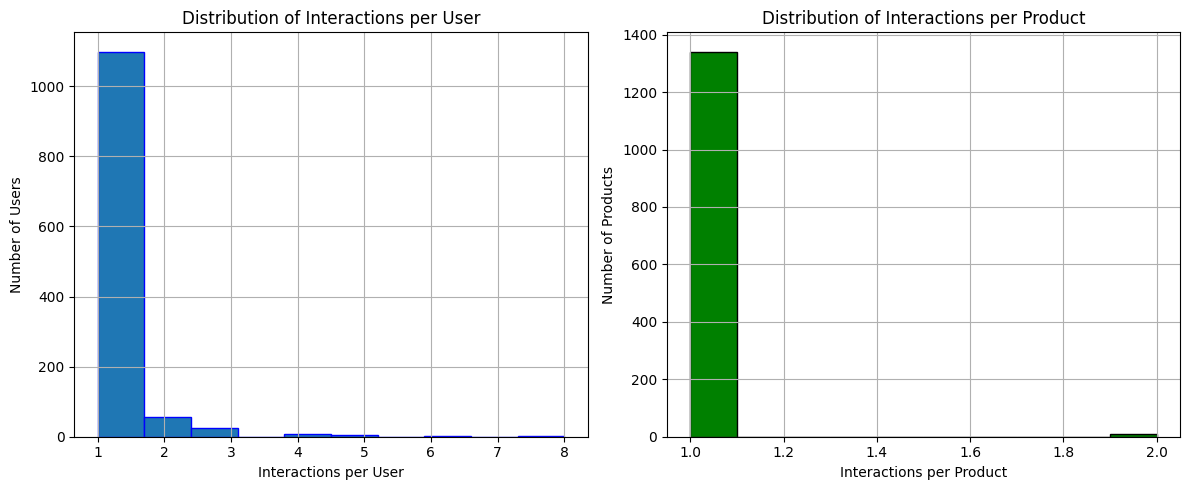

In [15]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df_clean['user_id'].value_counts().hist(bins=10, edgecolor='blue')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
df_clean['product_id'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Product')
plt.ylabel('Number of Products')
plt.title('Distribution of Interactions per Product')

plt.tight_layout()
plt.show()

<Axes: xlabel='rating'>

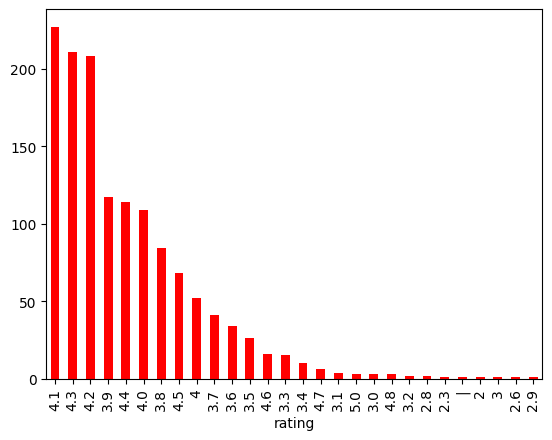

In [16]:
df_clean['rating'].value_counts().plot(kind='bar',color='red')

#### Text Processing

In [17]:
nlp = spacy.load("en_core_web_sm")

In [18]:
def clean_and_extract_tags(text):
    text = nlp(text.lower())
    tags = [token.lemma_ for token in text if (token.is_alpha and len(token) > 2) and token.lemma_ not in STOP_WORDS]
    return ', '.join(tags)

columns_to_extract_tags_from = ['about_product']

for column in columns_to_extract_tags_from:
    df_clean[column] = df_clean[column].apply(clean_and_extract_tags)

In [19]:
df_clean['category'] = df_clean['category'].str.replace('|', ', ')

In [20]:
columns_to_extract_tags = ['product_name', 'category', 'about_product']

In [21]:
df_clean['Tags'] = df_clean[columns_to_extract_tags].apply(lambda row: ', '.join(row), axis=1)

In [22]:
df_clean['rating'] = pd.to_numeric(df_clean['rating'], errors='coerce')

In [23]:
df_clean.head()

,user_id,product_id,rating,category,product_name,about_product,Tags
0,623,346,4.2,"Computers&Accessories, Accessories&Peripherals, Cables&Accessories, Cables, USBCables",Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13...,"high, compatibility, compatible, iphone, xsmax, iphone, plus, iphone, plus, iphone, plus, iphone...",Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13...
1,88,848,4.0,"Computers&Accessories, Accessories&Peripherals, Cables&Accessories, Cables, USBCables","Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, L...","compatible, type, enable, device, android, smartphone, samsung, oppo, vivo, realme, oneplus, etc...","Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, L..."
2,849,819,3.9,"Computers&Accessories, Accessories&Peripherals, Cables&Accessories, Cables, USBCables","Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7,...","fast, charger, datum, build, safety, proctection, core, copper, wire, promote, maximum, signal, ...","Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7,..."
3,254,643,4.2,"Computers&Accessories, Accessories&Peripherals, Cables&Accessories, Cables, USBCables","boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A...","boat, deuce, usb, cable, compatible, smartphone, tablet, peripheral, bluetooth, speaker, power, ...","boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A..."
4,17,588,4.2,"Computers&Accessories, Accessories&Peripherals, Cables&Accessories, Cables, USBCables",Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhon...,"charge, sync, cable, come, charge, data, sync, quality, tpe, nylon, material, sure, life, cable,...",Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhon...


In [24]:
df_clean.to_pickle('df_clean.pkl')

#### Recommendation based on user purchases

In [25]:
def get_popularity_score(df, product_id):
    return df[df['product_id'] == product_id].shape[0]

def get_recommendation_user_purchases(df, user_id, n):
    user_purchases = df[df['user_id'] == user_id]
    user_tags = user_purchases['Tags'].tolist()

    user_profile = ', '.join(user_tags)
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df['Tags'].tolist() + [user_profile])

    cosine_sim = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])
    similarity_scores = cosine_sim[0]

    popularity_scores = df['product_id'].apply(lambda x: get_popularity_score(df, x))

    # Combine similarity scores with popularity (e.g., 70% similarity, 30% popularity)
    combined_scores = 0.7 * similarity_scores + 0.3 * popularity_scores

    similar_indices = combined_scores.argsort()[-n:][::-1]

    recommended_products = df.iloc[similar_indices][['product_id', 'product_name', 'Tags']]

    return recommended_products

In [26]:
def get_recommendations_for_all_users(df, n=3):
    all_users = df['user_id'].unique()
    recommendations = {}

    for user in all_users:
        recommendations[user] = get_recommendation_user_purchases(df, user, n=n)['product_id'].tolist()

    return recommendations

In [27]:
def evaluate_recommendations_weighted(df, recommendations):
    precision_scores = []
    recall_scores = []
    weights = []

    for user_id, recommended_products in recommendations.items():
        # Get the actual products the user has purchased
        actual_products = df[df['user_id'] == user_id]['product_id'].tolist()
        num_actual_purchases = len(actual_products)

        if num_actual_purchases > 0 and len(recommended_products) > 0:
            true_positives = len(set(actual_products) & set(recommended_products))
            precision = true_positives / len(recommended_products)
            recall = true_positives / num_actual_purchases

            precision_scores.append(precision)
            recall_scores.append(recall)
            weights.append(num_actual_purchases)

    # Normalize the weights (sum of weights should equal 1)
    total_purchases = sum(weights)
    normalized_weights = [w / total_purchases for w in weights]

    weighted_precision = sum(p * w for p, w in zip(precision_scores, normalized_weights))
    weighted_recall = sum(r * w for r, w in zip(recall_scores, normalized_weights))

    return weighted_precision, weighted_recall

recommendations = get_recommendations_for_all_users(df_clean, n=3)

weighted_precision, weighted_recall = evaluate_recommendations_weighted(df_clean, recommendations)

print(f"Weighted Precision: {weighted_precision}")
print(f"Weighted Recall: {weighted_recall}")

Weighted Precision: 0.4151359294636391
Weighted Recall: 0.9603232916973121
